In [1]:
# Data Processing Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler, LabelEncoder


# Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.io as pio



# Feature Selection Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline


# Machine Learning Algorithms

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB


# Machine Learning Model Evaluation Libraries
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

import joblib


In [2]:
df = pd.read_csv(r"DataSets/Crop_Recommendation.csv")
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


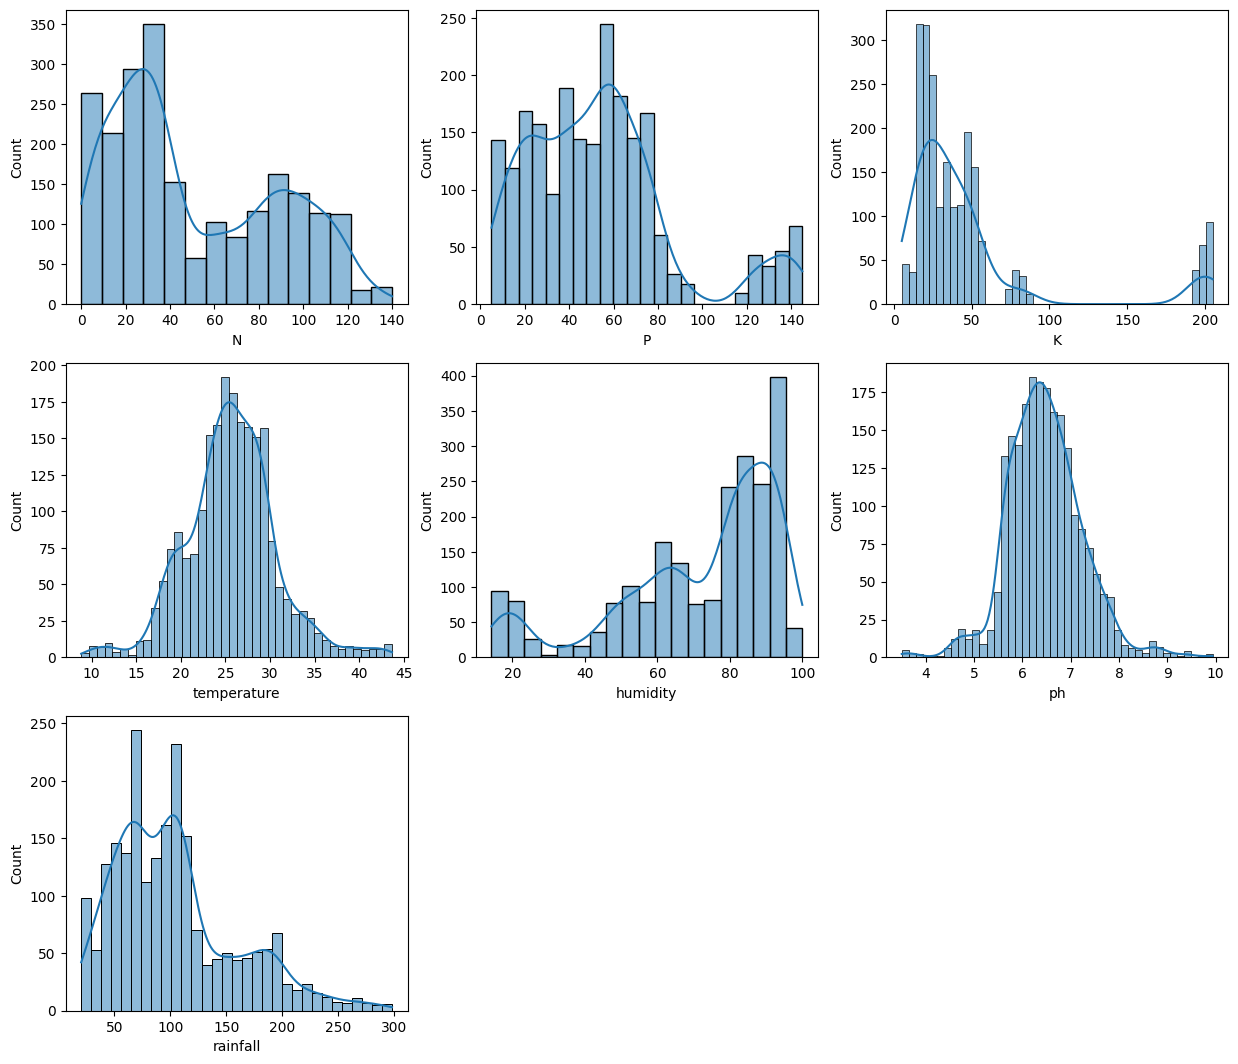

In [4]:
UnivariantAnalCol = df.columns[:-1]

plt.figure(figsize=(15,13))
i = 1
for column in UnivariantAnalCol:
    plt.subplot(3,3,i)
    sns.histplot(df[column],kde=True)
    i+=1
plt.show()

In [5]:
df.head()
crops = df.groupby('label').mean()
crops

,N,P,K,temperature,humidity,ph,rainfall
label,,,,,,,
apple,20.80,134.22,199.89,22.630942,92.333383,5.929663,112.654779
banana,100.23,82.01,50.05,27.376798,80.358123,5.983893,104.626980
blackgram,40.02,67.47,19.24,29.973340,65.118426,7.133952,67.884151
chickpea,40.09,67.79,79.92,18.872847,16.860439,7.336957,80.058977
coconut,21.98,16.93,30.59,27.409892,94.844272,5.976562,175.686646
coffee,101.20,28.74,29.94,25.540477,58.869846,6.790308,158.066295
cotton,117.77,46.24,19.56,23.988958,79.843474,6.912675,80.398043
grapes,23.18,132.53,200.11,23.849575,81.875228,6.025937,69.611829
jute,78.40,46.86,39.99,24.958376,79.639864,6.732778,174.792798


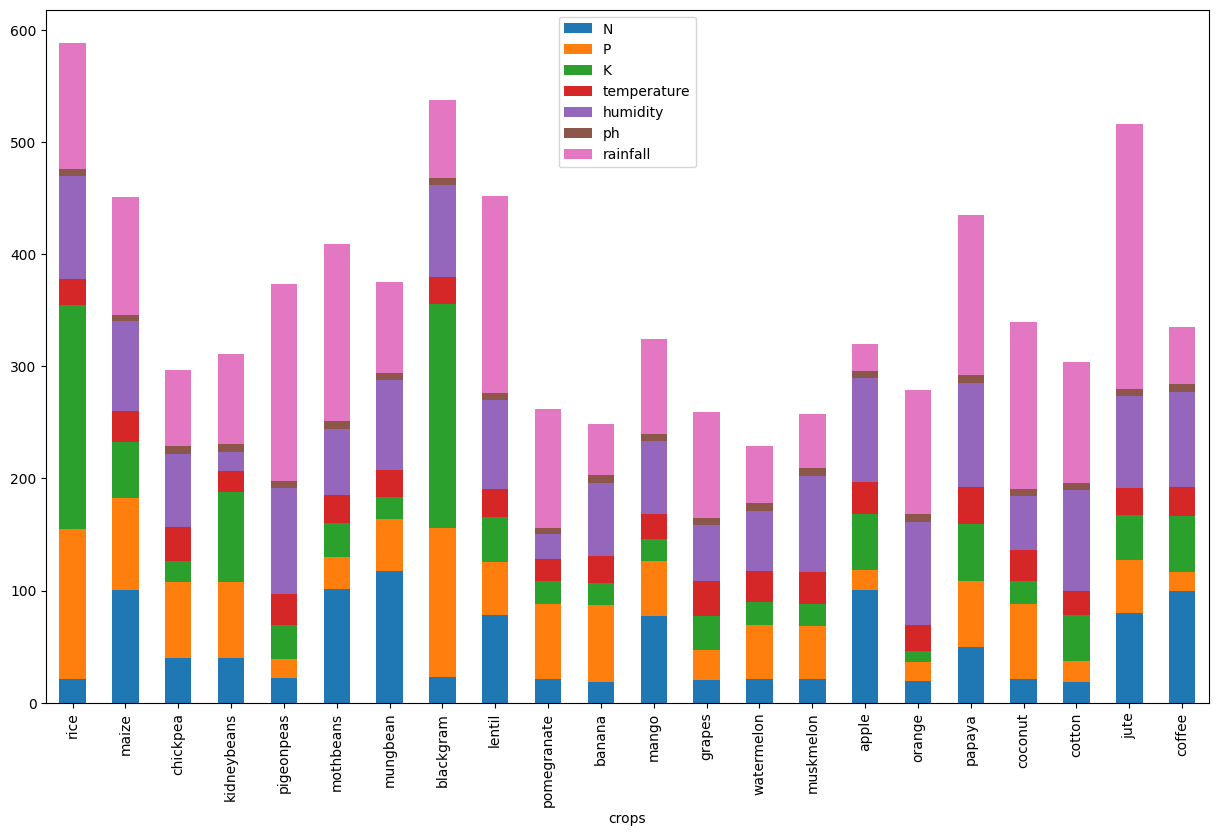

In [6]:
crops_list = df['label'].unique()
crops['crops'] = crops_list
crops.plot(x='crops', kind='bar', stacked=True,
        title='' , figsize=(15, 9));

In [7]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
labels = df['label']

In [8]:
ML_models = []
Model_Accuracies = []

In [9]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

In [10]:

print(Ytrain.value_counts())

label
apple          87
kidneybeans    86
watermelon     85
blackgram      84
rice           84
pomegranate    83
banana         83
pigeonpeas     82
grapes         82
papaya         81
mothbeans      81
cotton         80
maize          79
chickpea       79
coconut        79
coffee         78
lentil         77
muskmelon      77
mungbean       76
mango          74
jute           72
orange         71
Name: count, dtype: int64


In [11]:
Xtrain.head()

,N,P,K,temperature,humidity,ph,rainfall
1936,113,38,25,22.000851,79.472710,7.388266,90.422242
610,28,35,22,29.530376,86.733460,7.156563,59.872321
372,11,61,21,18.623288,23.024103,5.532101,135.337803
1559,29,139,205,23.641424,93.744615,6.155939,116.691218
1500,24,128,196,22.750888,90.694892,5.521467,110.431786


In [12]:
Ytrain.head()

1936         cotton
610        mungbean
372     kidneybeans
1559          apple
1500          apple
Name: label, dtype: object

           Actual    Predicted
2121       coffee       coffee
960   pomegranate  pomegranate
952   pomegranate  pomegranate
1958       cotton       cotton
681      mungbean     mungbean
...           ...          ...
1684       orange       orange
1477    muskmelon    muskmelon
851        lentil       lentil
370   kidneybeans   pigeonpeas
2010         jute         jute

[440 rows x 2 columns]
DecisionTrees's Accuracy is:  90.0
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.59      1.00      0.74        16
    chickpea       1.00      1.00      1.00        21
     coconut       0.91      1.00      0.95        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.74      0.93      0.83        28
 kidneybeans       0.00     

C:\Users\Lkumar\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lkumar\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lkumar\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

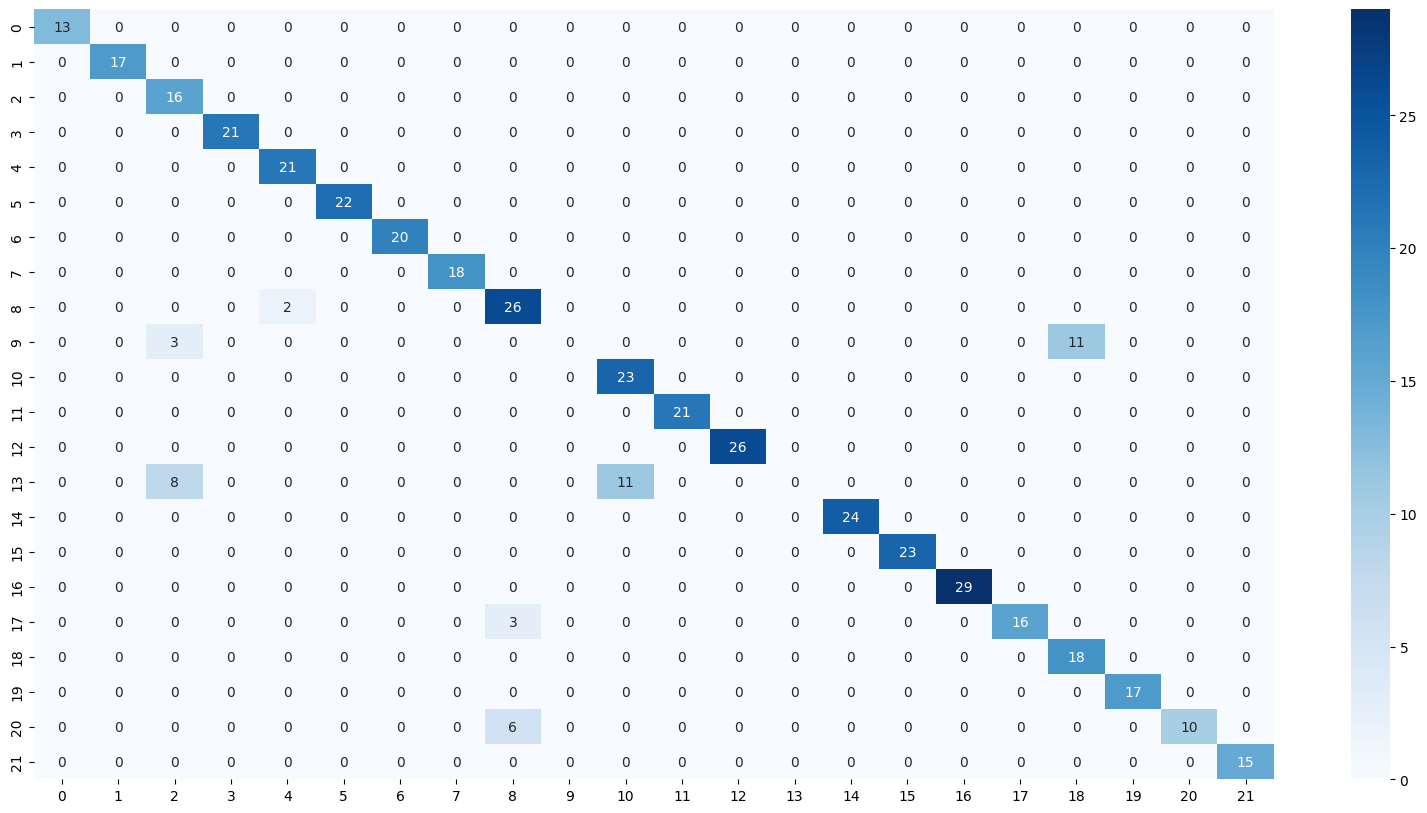

In [13]:
DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
Model_Accuracies.append(x*100)
ML_models.append('Decision Tree')

# Comparing Actual vs Predicted
DT_OutputDF = pd.DataFrame({'Actual': Ytest, 'Predicted': predicted_values}) #Comparing the accurracy  
print(DT_OutputDF) 
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))
plt.figure(figsize=(20,10))
sns.heatmap(confusion_matrix(Ytest,predicted_values), annot=True, cmap="Blues")
plt.show()

           Actual    Predicted
2121       coffee       coffee
960   pomegranate  pomegranate
952   pomegranate  pomegranate
1958       cotton       cotton
681      mungbean     mungbean
...           ...          ...
1684       orange       orange
1477    muskmelon    muskmelon
851        lentil       lentil
370   kidneybeans  kidneybeans
2010         jute         jute

[440 rows x 2 columns]
RF's Accuracy is:  99.0909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.90      1.00      0.95        28
 kidneybeans       1.00    

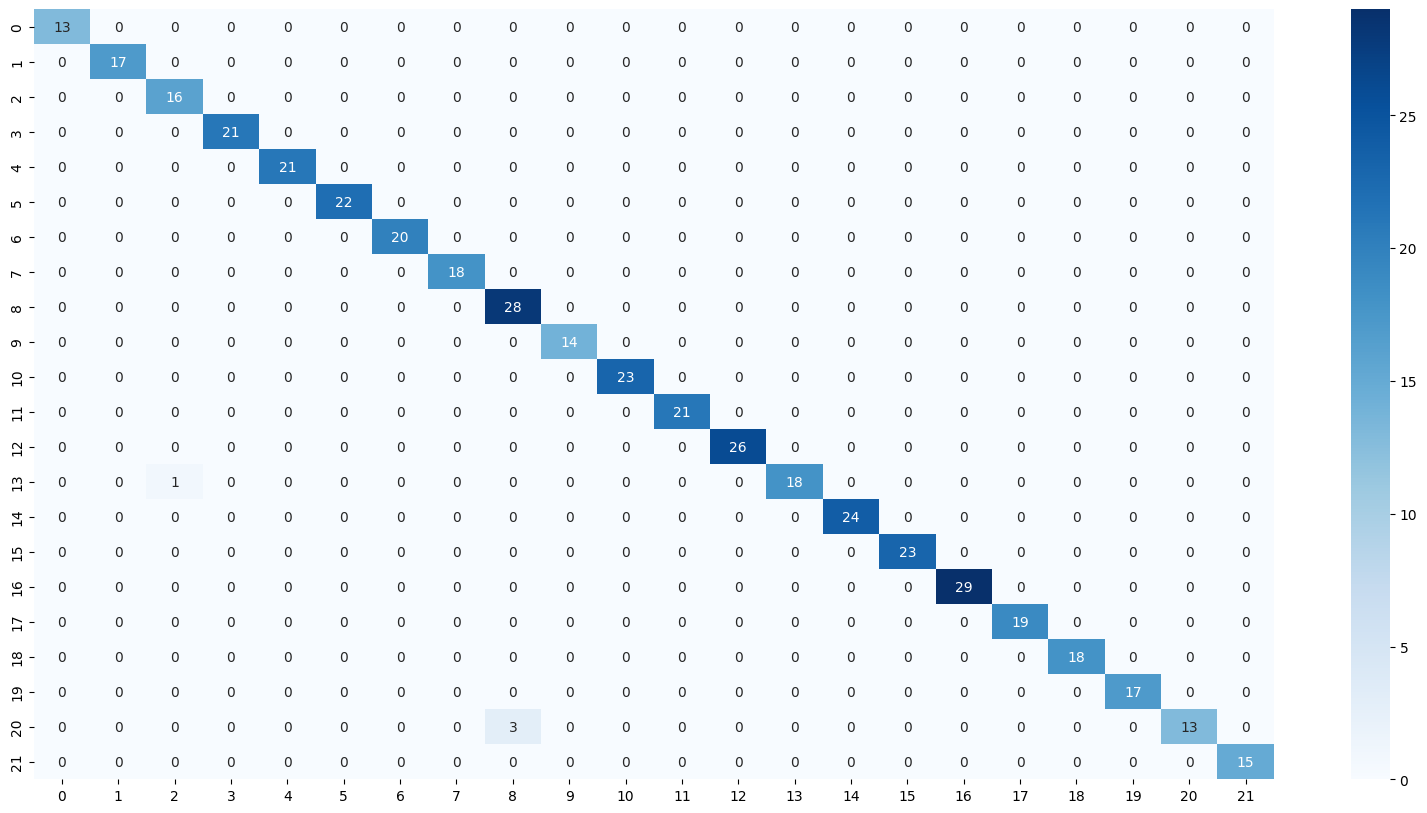

In [14]:
RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
Model_Accuracies.append(x*100)
ML_models.append('RF')
RF_OutputDF = pd.DataFrame({'Actual': Ytest, 'Predicted': predicted_values}) #Comparing the accurracy  
print(RF_OutputDF) 
print("RF's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))
plt.figure(figsize=(20,10))
sns.heatmap(confusion_matrix(Ytest,predicted_values), annot=True, cmap="Blues")
plt.show()

In [15]:
print(ML_models)
print(Model_Accuracies)

['Decision Tree', 'RF']
[90.0, 99.0909090909091]


In [ ]:
feature_names = ['N','P','K','temperature','humidity','ph','rainfall']
input_data = np.array([[61,52,41,24.97669518,83.891805,6.880431223,204.8001847]])
input_df = pd.DataFrame(input_data, columns=feature_names)
RF_output = RF.predict(input_df)
print(RF_output)

['rice']


In [17]:
joblib.dump(RF,'Crop_Recommend.pkl')
print('Model Saved')

Model Saved
